<a href="https://colab.research.google.com/github/cibergus/ML-open/blob/main/Exercise_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Processing Data

# Data Loading, Preprocessing & Batching
- Dataset Class (torch.utils.data.Dataset)
- Dataloader Class (torch.utils.data.DataLoader)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Dataset Class
- **torch.utils.data.Dataset** class defines how to load and preprocess data, returns a dataset object
- Can **Concat** and Subset dataset objects
- Need to define: 
  - \_\_getitem\_\_()
  - \_\_len()\_\_
  - \_\_extra_repr\_\_() (optional)

In [ ]:
# Example Custom Dataset class from CSV file data
import torch
import csv

class MyDataset(Dataset):
  def __init__(self, csvfile, transform = None):
    super(MyDataset).__init__()
    self.index = 0
    with open(csvfile, newline='') as f:
      reader = csv.reader(f)
      self.samples = list(reader)

  def __getitem__(self):
    data, label = self.samples[self.index]
    if (transform is not None):
      data = transform(data)  
    self.index += 1
    return data, label

  def __len__(self):
    return len(self.samples)


# Torchvision Datasets
- **torchvision.datasets** includes many famous datasets for CV
- Each one is derived from the Dataset class
- Includes:
  - CIFAR100, CIFAR100
  - CelabA
  - Cityscapes
  - COCO
  - DatasetFolder
  - Fashion-MNIST
  - Flickr
  - ImageNet
  - Places365
  - and more!

# CIFAR10 Dataset ([pytorch.tips/cifar](https://pytorch.tips/cifar))
- The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes.
- 6000 images per class: 50000 training images and 10000 test images.


# Transforms (torchvision)
- Examples: Resize(), Crop(), RandomCrop(),  

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

trainset = datasets.CIFAR10(root=".", 
                            train = True, 
                            transform = transform, 
                            download = True)
print(trainset)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
print(type(trainset[0]), len(trainset[0]))
print(trainset[0][0].shape)
print(trainset[0][1])

<class 'tuple'> 2
torch.Size([3, 32, 32])
6


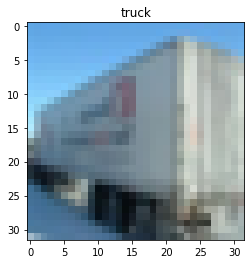

In [ ]:
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
idx = 15
plt.imshow(trainset[idx][0].permute(1,2,0))
plt.title(classes[trainset[idx][1]]);

# DataLoader Class (Dataset & Sampler)
- **torch.utils.data.DataLoader** - general class
- By using Dataset class, you get all DataLoader capability for free!

In [ ]:
trainloader = DataLoader(trainset, 
                         batch_size = 4, 
                         shuffle = True)

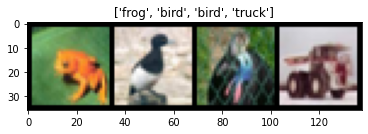

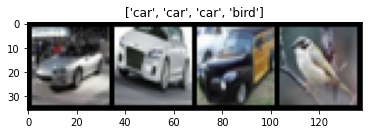

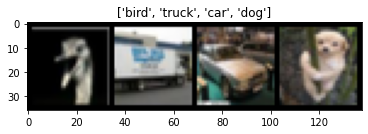

In [ ]:
import matplotlib.pyplot as plt
from torchvision import utils

i = 0
for images, labels in trainloader:
  if i == 3:
     break
  grid = utils.make_grid(images)
  plt.figure()
  plt.imshow(grid.permute(1,2,0))
  plt.title([classes[idx.item()] for idx in labels])
  i += 1

# Try Later:
- Data Loading Tutorial ([pytorch.org/tutorials/beginner/data_loading_tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html))

